In [1]:
import sklearn
import sklearn.discriminant_analysis as disc_an
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# The Data

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
print(data["data"])
X = data["data"]

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [5]:
print(data["target"])
y = data["target"]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# Classifiers

## QDA

In [6]:
clf = disc_an.QuadraticDiscriminantAnalysis()
clf.fit(X, y)
y_pred_proba = clf.predict_proba(X)
y_pred_fit = clf.predict(X)
score = clf.score(X, y)
print("score: ", score)

score:  0.9736379613356766


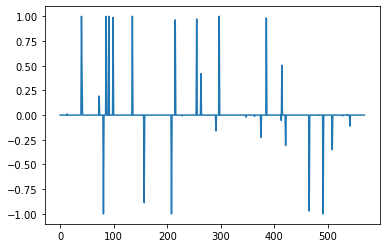

In [7]:
plt.plot(y_pred_proba[:, 1] - y)

In [8]:
np.mean(abs(y_pred_proba[:, 1] - y))

0.02913819564068747

In [9]:
np.mean(abs(y_pred_fit - y))

0.026362038664323375

### Cross validation

In [10]:
cv_results = cross_validate(clf, X, y, cv=5)

In [11]:
cv_results

{'fit_time': array([0.01215219, 0.00235796, 0.00237966, 0.00230575, 0.00215793]),
 'score_time': array([0.0009191 , 0.00107002, 0.00072455, 0.00070524, 0.00069928]),
 'test_score': array([0.97368421, 0.94736842, 0.96491228, 0.94736842, 0.95575221])}

In [12]:
from sklearn.model_selection import cross_val_predict
y_pred_cross_val = cross_val_predict(clf, X, y, cv=5)

In [13]:
np.mean(abs(y_pred_cross_val - y))

0.0421792618629174

## LDA

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [15]:
y_pred_proba = clf.predict_proba(X)
y_pred_fit = clf.predict(X)
score = clf.score(X, y)
print("score: ", score)

score:  0.9648506151142355


In [16]:
np.mean(abs(y_pred_proba[:, 1] - y))

0.044402726173494604

In [17]:
np.mean(abs(y_pred_fit- y))

0.0351493848857645

In [18]:
cv_results = cross_validate(clf, X, y, cv=5)
from sklearn.model_selection import cross_val_predict
y_pred_cross_val = cross_val_predict(clf, X, y, cv=5)
np.mean(abs(y_pred_cross_val - y))

0.040421792618629174

### Confusion Matrix

In [19]:
confusion_matrix(y, y_pred_cross_val)

array([[191,  21],
       [  2, 355]])